Import required libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Define input data and target values

In [ ]:
X = np.array([0.5, 2.5])  # Input features
Y = np.array([0.2, 0.9])  # Target outputs

Define the sigmoid function

Sigmoid function:
    f(w, b, x) = 1 / (1 + exp(-(w*x + b)))
    
    Parameters:
    w : Weight parameter
    b : Bias parameter
    x : Input feature

In [ ]:
def f(w, b, x):
    return 1.0 / (1.0 + np.exp(-(w * x + b)))  # Sigmoid activation function

Define the error function (Mean Squared Error - MSE)

Mean Squared Error (MSE) function:
    E(w, b) = (1/2) * Σ (f(w, b, x) - y)^2
    
    Parameters:
    w : Weight parameter
    b : Bias parameter

In [ ]:
def error(w, b):
    err = 0.0
    for x, y in zip(X, Y):
        fx = f(w, b, x)
        err += 0.5 * (fx - y) ** 2  # MSE formula
    return err

Compute gradient with respect to bias

Gradient of error function w.r.t bias:
    ∂E/∂b = (f(w, b, x) - y) * f(w, b, x) * (1 - f(w, b, x))
    
    Parameters:
    w, b : Weight and bias parameters
    x, y : Feature and target values

In [ ]:
def grad_b(w, b, x, y):
    fx = f(w, b, x)
    return (fx - y) * fx * (1 - fx)  # Derivative of loss w.r.t b

Compute gradient with respect to weight

Gradient of error function w.r.t weight:
    ∂E/∂w = (f(w, b, x) - y) * f(w, b, x) * (1 - f(w, b, x)) * x
    
    Parameters:
    w, b : Weight and bias parameters
    x, y : Feature and target values

In [ ]:
def grad_w(w, b, x, y):
    fx = f(w, b, x)
    return (fx - y) * fx * (1 - fx) * x  # Derivative of loss w.r.t w

Perform gradient descent to minimize the error

Gradient Descent Algorithm:

    w = w - η * (∂E/∂w)

    b = b - η * (∂E/∂b)
    

    Steps:
    1. Initialize parameters (w, b) and learning rate (eta)
    2. Compute gradients for weight and bias
    3. Update parameters using the gradients
    4. Repeat for a fixed number of epochs

In [ ]:
def do_gradient_descent():
    w, b = -2, -2  # Initialize weight and bias
    eta = 1.0  # Learning rate
    max_epochs = 1000  # Number of iterations

    w_vals, b_vals, err_vals = [], [], []  # Store values for visualization

    for i in range(max_epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)

        w = w - eta * dw  # Update weight
        b = b - eta * db  # Update bias

        w_vals.append(w)
        b_vals.append(b)
        err_vals.append(error(w, b))  # Store error

    return w_vals, b_vals, err_vals

Generate weight and bias ranges for error surface visualization

In [ ]:
w_range = np.linspace(-3, 3, 50)
b_range = np.linspace(-3, 3, 50)
W, B = np.meshgrid(w_range, b_range)

Compute error surface

In [ ]:
Error_surface = np.array([[error(w, b) for w in w_range] for b in b_range])

Perform gradient descent and get history

In [ ]:
w_vals, b_vals, err_vals = do_gradient_descent()

Plot 3D error surface

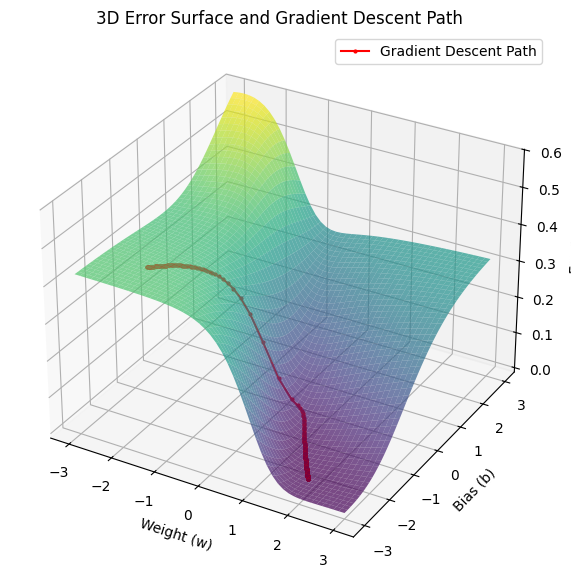

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
# Plot the error surface
ax.plot_surface(W, B, Error_surface, cmap='viridis', alpha=0.7)

# Plot the gradient descent path
ax.plot(w_vals, b_vals, err_vals, color='r', marker='o', markersize=2, label="Gradient Descent Path")

# Labels and title
ax.set_xlabel("Weight (w)")
ax.set_ylabel("Bias (b)")
ax.set_zlabel("Error")
ax.set_title("3D Error Surface and Gradient Descent Path")
ax.legend()

# Show the plot
plt.show()